In [58]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import fetch_california_housing  
from sklearn.svm import SVR
from sklearn.tree import plot_tree


In [59]:
data = fetch_california_housing()

In [60]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [61]:
df = pd.DataFrame(data.data, columns =data.feature_names)

In [62]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [63]:
df['MidHouseValue'] = data.target

In [64]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MidHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [65]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MidHouseValue    0
dtype: int64

In [66]:
x = df.drop(columns='MidHouseValue')

In [67]:
y = df['MidHouseValue']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=42, random_state=42)

In [69]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled = scaler.transform(x_test)

In [70]:
svm_reg_model = SVR(kernel='rbf', C=100, epsilon=0.1)

In [71]:
svm_reg_model.fit(x_train_scaled, y_train)

SVR(C=100)

In [72]:
prediction = svm_reg_model.predict(x_test_scaled)

In [73]:
prediction


array([0.46705606, 1.34439199, 4.78904682, 2.4577926 , 2.989485  ,
       1.61058307, 2.51018253, 1.62726379, 2.22682396, 4.73288603,
       0.9297154 , 2.02256926, 1.47329204, 1.84133176, 2.29308938,
       1.58688281, 1.97096456, 1.3568148 , 1.7962633 , 0.96232518,
       4.24212896, 3.27966665, 1.24221456, 4.00685407, 1.69529911,
       0.72575838, 2.07771974, 1.09702344, 1.80016776, 3.86380358,
       1.15108469, 0.88442206, 1.76285722, 3.48151425, 2.23598262,
       2.6519517 , 2.91451294, 1.4278608 , 1.22429296, 1.39352814,
       2.77326702, 0.88228927])

In [74]:
r2 = r2_score(y_test,prediction)
print(f"The r2 score of the model is: ",r2)

The r2 score of the model is:  0.8580544194569355


In [75]:
mse = mean_squared_error(y_test, prediction)
print(f"The mean squared error of the models is : ",mse)

The mean squared error of the models is :  0.21224476504361336


In [76]:
joblib.dump(svm_reg_model,"SVM_Reg_Model.pkl")

['SVM_Reg_Model.pkl']

Reducing the dimension for visualization

In [77]:
x_single_feature_train = x_train_scaled[:,0].reshape(-1,1)

In [78]:
x_single_feature_train

array([[-0.84323177],
       [-0.2118194 ],
       [ 0.03322121],
       ...,
       [-0.49253482],
       [ 0.9727628 ],
       [-0.68137973]])

In [79]:
x_single_feature_test=x_test_scaled[:,0].reshape(-1,1)

In [80]:
x_single_feature_test

array([[-1.15193979],
       [-0.70463675],
       [-0.20540005],
       [ 0.98244446],
       [-0.07653931],
       [ 0.44421804],
       [ 0.63848257],
       [-0.09453456],
       [ 0.49099517],
       [ 2.23243046],
       [-0.69916451],
       [-0.45801761],
       [-0.53199809],
       [-0.27864388],
       [ 0.78733804],
       [-0.02649988],
       [ 0.01885658],
       [ 0.13898278],
       [-0.02481611],
       [-0.88553639],
       [ 0.18902221],
       [ 0.26110845],
       [ 0.77734068],
       [ 1.19012651],
       [ 0.18570729],
       [-1.00513642],
       [-0.69458677],
       [-0.32647337],
       [-0.11600258],
       [ 1.22722198],
       [-1.18435229],
       [-1.38935084],
       [-0.23249816],
       [ 1.70499067],
       [-0.19919116],
       [ 0.86063449],
       [ 0.26547572],
       [-0.24149579],
       [-0.40976718],
       [-0.59898042],
       [ 1.44006057],
       [-0.0414433 ]])

In [81]:
svm_reg_model_single_col = SVR(kernel='rbf', C=100, epsilon=0.1)

In [82]:
svm_reg_model_single_col.fit(x_single_feature_train,y_train)

SVR(C=100)

In [83]:
prediction = svm_reg_model_single_col.predict(x_single_feature_test)

In [84]:
prediction

array([0.90312739, 1.3334461 , 1.72128451, 2.67733906, 1.80257209,
       2.19810867, 2.34910088, 1.79090586, 2.23464975, 4.27043558,
       1.33904184, 1.55355013, 1.49478923, 1.675717  , 2.47364098,
       1.8358269 , 1.86713515, 1.95561672, 1.83696857, 1.13968613,
       1.99451825, 2.0518673 , 2.46464421, 2.9503192 , 1.99191282,
       1.01721081, 1.34370232, 1.64517084, 1.77716164, 3.00177682,
       0.88635547, 0.87044729, 1.70450696, 3.54690537, 1.72512744,
       2.54352732, 2.05537133, 1.69892416, 1.58881027, 1.4361681 ,
       3.27861529, 1.82576149])

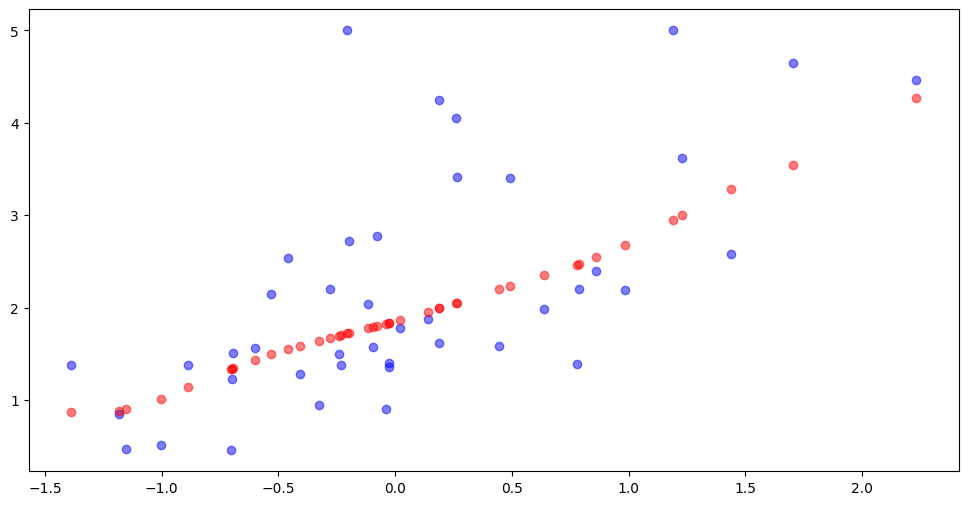

In [85]:
plt.figure(figsize=(12,6))
plt.scatter(x_single_feature_test,y_test, color="blue", label="Actual", alpha=0.5)
plt.scatter(x_single_feature_test,prediction, color="red", label="Actual", alpha=0.5)